In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv('/electronics_cleaned.csv')

# list of first five rows

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0,7


In [7]:
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2018,NaN,0,9
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2018,NaN,0,9
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2018,NaN,0,9
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0,9
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2018,Female,0,10


In [10]:
dataset.shape

(1292954, 11)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
 10  month       1292954 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 108.5+ MB


In [12]:
from datetime import datetime

pd.to_datetime(dataset['timestamp'])

,timestamp
0,1999-06-13
1,1999-06-14
2,1999-06-17
3,1999-07-01
4,1999-07-06
...,...
1292949,2018-09-26
1292950,2018-09-26
1292951,2018-09-26
1292952,2018-09-29


In [13]:
dataset['brand'] = dataset['brand'].astype(str)

In [14]:
dataset['category'] = dataset['category'].astype(str)

In [15]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])


In [16]:
dataset['rating'] = dataset['rating'].astype(float)

In [17]:
dataset['user_id'] = dataset['user_id'].astype(str)

In [18]:
dataset['item_id'] = dataset['item_id'].astype(str)

In [19]:
dataset.describe()

,rating,timestamp,year,split,month
count,1.292954e+06,1292954,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2015-06-18 11:30:34.851355904,2.014977e+03,1.747587e-01,6.340661e+00
min,1.000000e+00,1999-06-13 00:00:00,1.999000e+03,0.000000e+00,1.000000e+00
25%,4.000000e+00,2014-09-06 00:00:00,2.014000e+03,0.000000e+00,3.000000e+00
50%,5.000000e+00,2015-10-19 00:00:00,2.015000e+03,0.000000e+00,6.000000e+00
75%,5.000000e+00,2016-10-19 00:00:00,2.016000e+03,0.000000e+00,9.000000e+00
max,5.000000e+00,2018-10-01 00:00:00,2.018000e+03,2.000000e+00,1.200000e+01
std,1.379732e+00,NaN,2.117867e+00,5.506810e-01,3.576262e+00


In [20]:
dataset.nunique()

,0
item_id,9560
user_id,1157633
rating,5
timestamp,6354
model_attr,3
category,10
brand,51
year,20
user_attr,2
split,3


In [21]:
dataset.duplicated().sum()

0

In [22]:
dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,0
timestamp,0
model_attr,0
category,0
brand,0
year,0
user_attr,1118830
split,0


In [23]:
dataset['rating'].value_counts()

,count
rating,
5.0,755755
4.0,214166
1.0,143755
3.0,100630
2.0,78648


In [24]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

,count
year,
2015,320887
2016,302619
2017,192477
2014,180676
2013,99855
2018,80229
2012,38389
2011,23894
2010,16888


In [25]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

,count
month,
1,140773
12,124597
3,116464
2,110546
8,109835
7,107612
4,99136
5,98207
9,97368


In [26]:
dataset.dropna(inplace=True)

dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,0
timestamp,0
model_attr,0
category,0
brand,0
year,0
user_attr,0
split,0


<Axes: xlabel='rating', ylabel='count'>

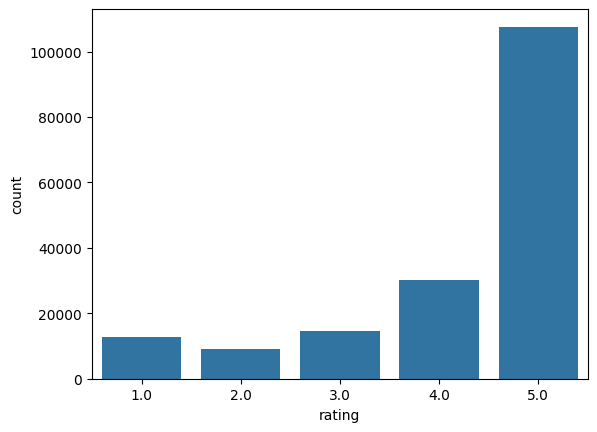

In [27]:
sns.countplot(x='rating', data=dataset)

In [28]:
dataset['rating'].value_counts()

,count
rating,
5.0,107593
4.0,30104
3.0,14593
1.0,12652
2.0,9182


<Axes: xlabel='year', ylabel='count'>

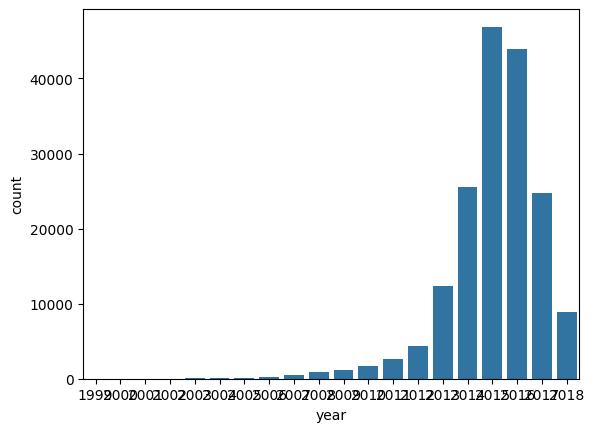

In [29]:
sns.countplot(x='year', data=dataset)

<Axes: xlabel='brand', ylabel='count'>

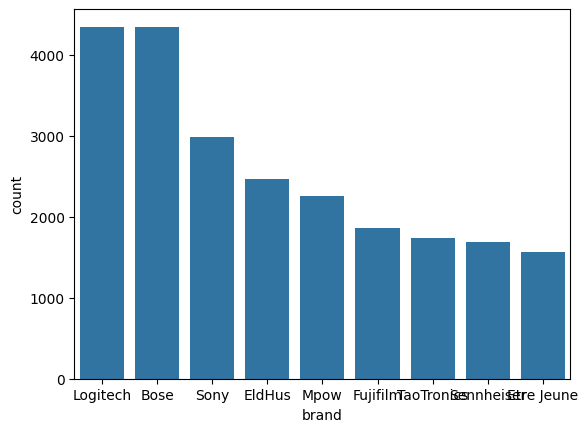

In [30]:
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

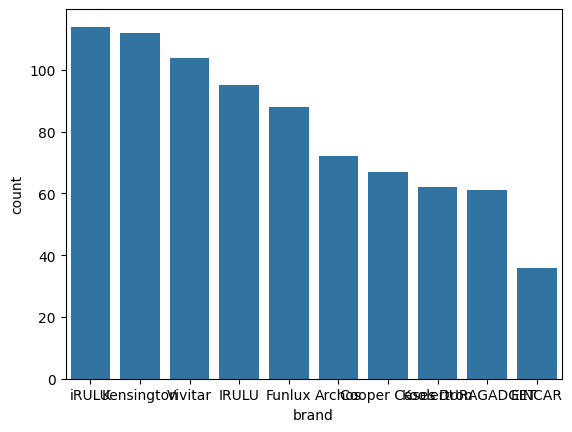

In [31]:
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)

<Axes: xlabel='brand', ylabel='count'>

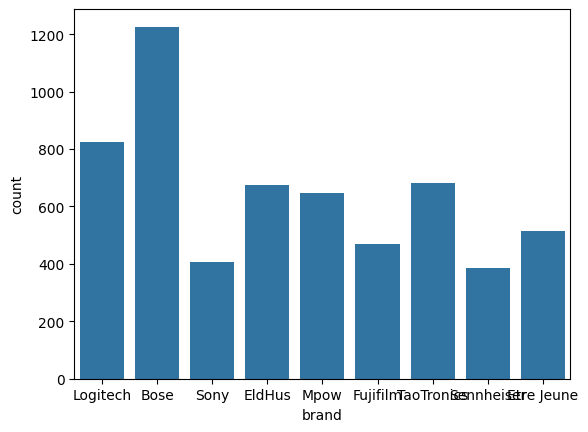

In [32]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2016], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

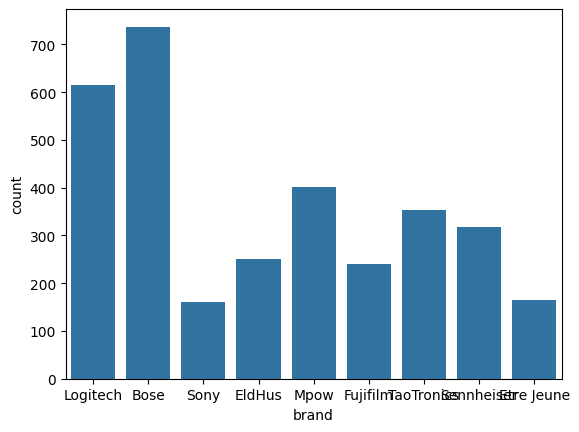

In [33]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2017], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

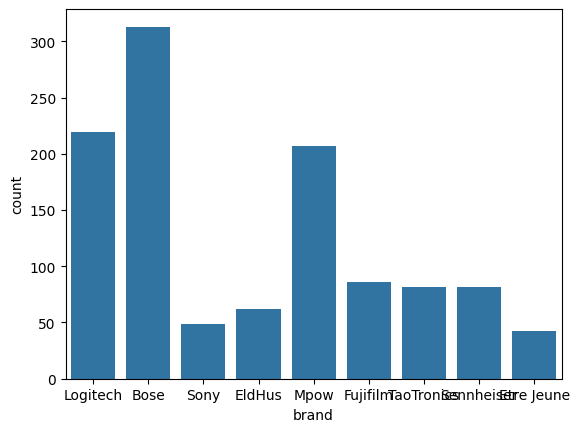

In [34]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2018], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='month', ylabel='count'>

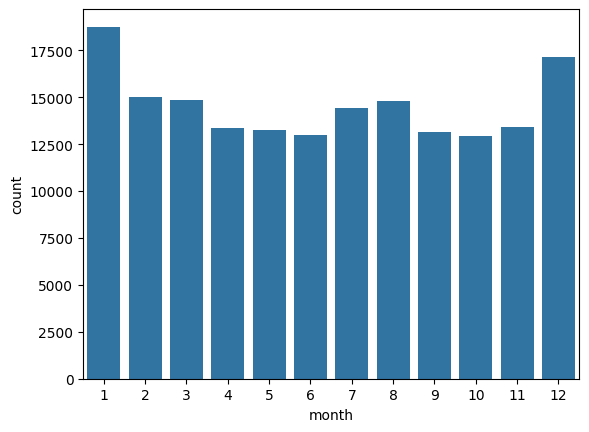

In [35]:
sns.countplot(x='month', data=dataset)

<Axes: xlabel='category', ylabel='count'>

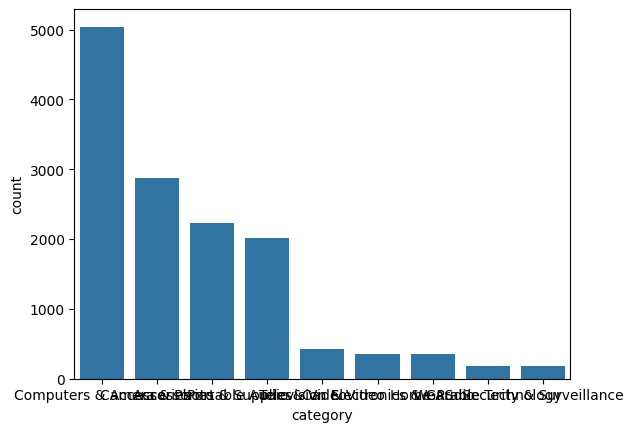

In [36]:
sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:10].index)

<Axes: xlabel='category', ylabel='count'>

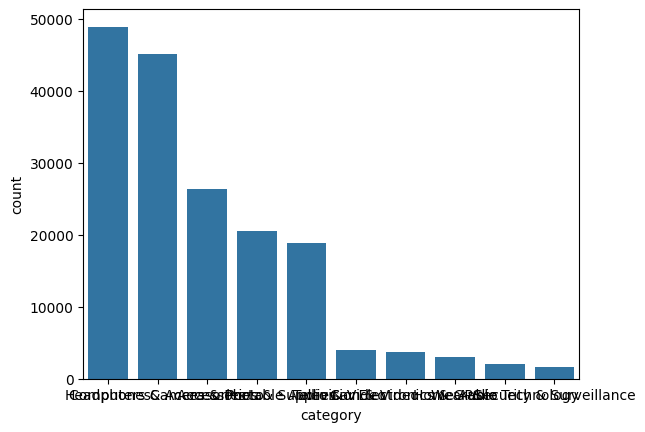

In [37]:
sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index)

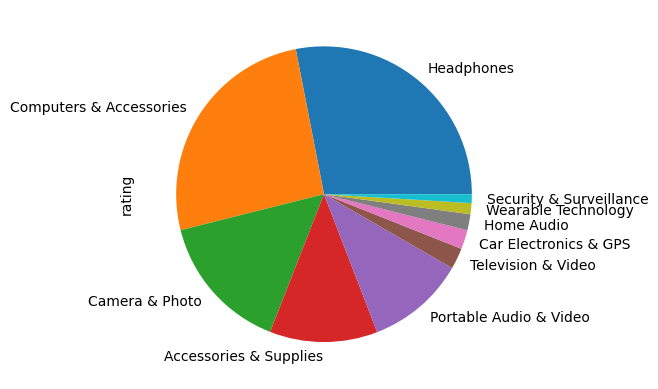

In [38]:
dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

# white background

sns.set_style('white')